### Курсовая работа 
### Выполнил: Идрисов Мухамет БСТ2201

In [39]:
# Импортируем библиотеки
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [40]:
# Класс хеш-таблицы
class HashTable:
    def __init__(self, initial_capacity=8):
        self.capacity = initial_capacity
        self.size = 0
        self.table = [None] * self.capacity

    def _hash(self, key):
        return hash(key) % self.capacity
    
    # Меняет размер, если не вмещаются элементы 
    def _resize(self):
        new_capacity = self.capacity * 2
        new_table = [None] * new_capacity

        # перехеширует
        for item in self.table:
            if item is not None:
                for key, value in item:
                    new_index = hash(key) % new_capacity
                    if new_table[new_index] is None:
                        new_table[new_index] = []
                    new_table[new_index].append((key, value))

        self.capacity = new_capacity
        self.table = new_table

    # Ставит значение по ключу
    def set(self, key, value):
        if self.size / self.capacity > 0.7:
            self._resize()

        index = self._hash(key)
        if self.table[index] is None:
            self.table[index] = []
        else:
            for i, (k, v) in enumerate(self.table[index]):
                if k == key:
                    self.table[index][i] = (key, value)
                    return

        self.table[index].append((key, value))
        self.size += 1

    # Достает значение по ключу
    def get(self, key):
        index = self._hash(key)
        if self.table[index] is not None:
            for k, v in self.table[index]:
                if k == key:
                    return v
        raise KeyError(f'Key {key} not found')


In [41]:
# Находит самое большое значение в хеш-таблице
def find_max(data, max_value):
    for i in data:
        if data[i]>max_value:
            max_value=data[i]
            max_index=i
    return max_value, max_index

In [42]:
def solving(file):
    total= max_profit= max_count = 0
    max_p_index= max_c_index = -1
    ht_count=dict()
    ht_profit=dict()
    names = []
    
    for row in file:
        # Собиарет основные данные с каждой строки
        name= row[2]
        try:
            count=int(row[4])
            price=float(row[5])
            row_total=float(row[6])
        except:
            continue
        names.append(name)
        total+= row_total

        # Добавляет значения в хеш-таблицу
        if not (name in ht_count):
            ht_count[name]=0
        ht_count[name]+=count
        
        # Добавляет значения в хеш-таблицу
        if not (name in ht_profit):
            ht_profit[name]=0
        ht_profit[name]+=count*price

    for name in range(1,len(ht_count)):
        print(f'Кол-во продаж: {ht_count[names[name]]}; '+
               f'Доля товара от выручки: {round(int(ht_profit[names[name]])/total*100,2)}%;' + 
               f' Название:{names[name]}')
    
    max_profit, max_p_name = find_max(ht_profit, max_profit)
    max_count, max_c_name = find_max(ht_count, max_count)

    return total, max_count, max_profit, max_p_name, max_c_name

In [43]:

data = pd.read_csv('table.csv', sep=';')
with open("table.csv", encoding='utf-8') as file:
    file_reader = csv.reader(file, delimiter = ";")
    total, max_count, max_profit, p_name, c_name = solving(file_reader)
    print()
    print(f'Общая выручка магазина: {total} рублей')
    print(f'Товар, который был продан наибольшее количество раз ({max_count}): {c_name}')
    print(f'Товар, который принес наибольшую выручку ({max_profit}): {p_name}')


Кол-во продаж: 9788; Доля товара от выручки: 0.12%; Название:Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)
Кол-во продаж: 14714; Доля товара от выручки: 0.24%; Название:Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices
Кол-во продаж: 16814; Доля товара от выручки: 0.38%; Название:boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)
Кол-во продаж: 10948; Доля товара от выручки: 0.07%; Название:Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)
Кол-во продаж: 11635; Доля товара от выручки: 0.18%; Название:pTron Solero TB301 3A Type-C Data and Fast Chargi

In [44]:
data = data.sort_values(by="Общая стоимость")
df=pd.DataFrame(data)
df = df[-20:]
df['Доля от общей выручки в %'] = df['Общая стоимость'] / (total / 100)
df['Доля от общей выручки в %'] = df['Доля от общей выручки в %'].round(4).astype(float)
df.index = df['Название товара']

In [45]:
df[['Количество продаж', 'Общая стоимость', 'Доля от общей выручки в %']]

,Количество продаж,Общая стоимость,Доля от общей выручки в %
Название товара,,,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",9122,4788685.12,0.3439
Samsung 80 cm (32 Inches) Wondertainment Series HD Ready LED Smart TV UA32T4340BKXXL (Glossy Black),9125,4790260.00,0.3440
"Ambrane Unbreakable 3 in 1 Fast Charging Braided Multipurpose Cable for Speaker with 2.1 A Speed - 1.25 meter, Black",9197,4828057.12,0.3467
"Philips EasySpeed Plus Steam Iron GC2147/30-2400W, Quick Heat up with up to 30 g/min steam, 150g steam Boost, Scratch Resistant Ceramic Soleplate, Vertical steam, Drip-Stop",9232,4846430.72,0.3480
"NK STAR 950 Mbps USB WiFi Adapter Wireless Network Receiver Dongle for Desktop Laptop, (Support- Windows XP/7/8/10 & MAC OS) NOt Support to DVR and HDTV",9326,4895776.96,0.3516
MI Power Bank 3i 20000mAh Lithium Polymer 18W Fast Power Delivery Charging | Input- Type C | Micro USB| Triple Output | Sandstone Black,9745,4897252.30,0.3517
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",9341,4903651.36,0.3521
"Motorola a10 Dual Sim keypad Mobile with 1750 mAh Battery, Expandable Storage Upto 32GB, Wireless FM with Recording - Rose Gold",9863,4956552.02,0.3559
"Model-P4 6 Way Swivel Tilt Wall Mount 32-55-inch Full Motion Cantilever for LED,LCD and Plasma TV's",9459,4965596.64,0.3566


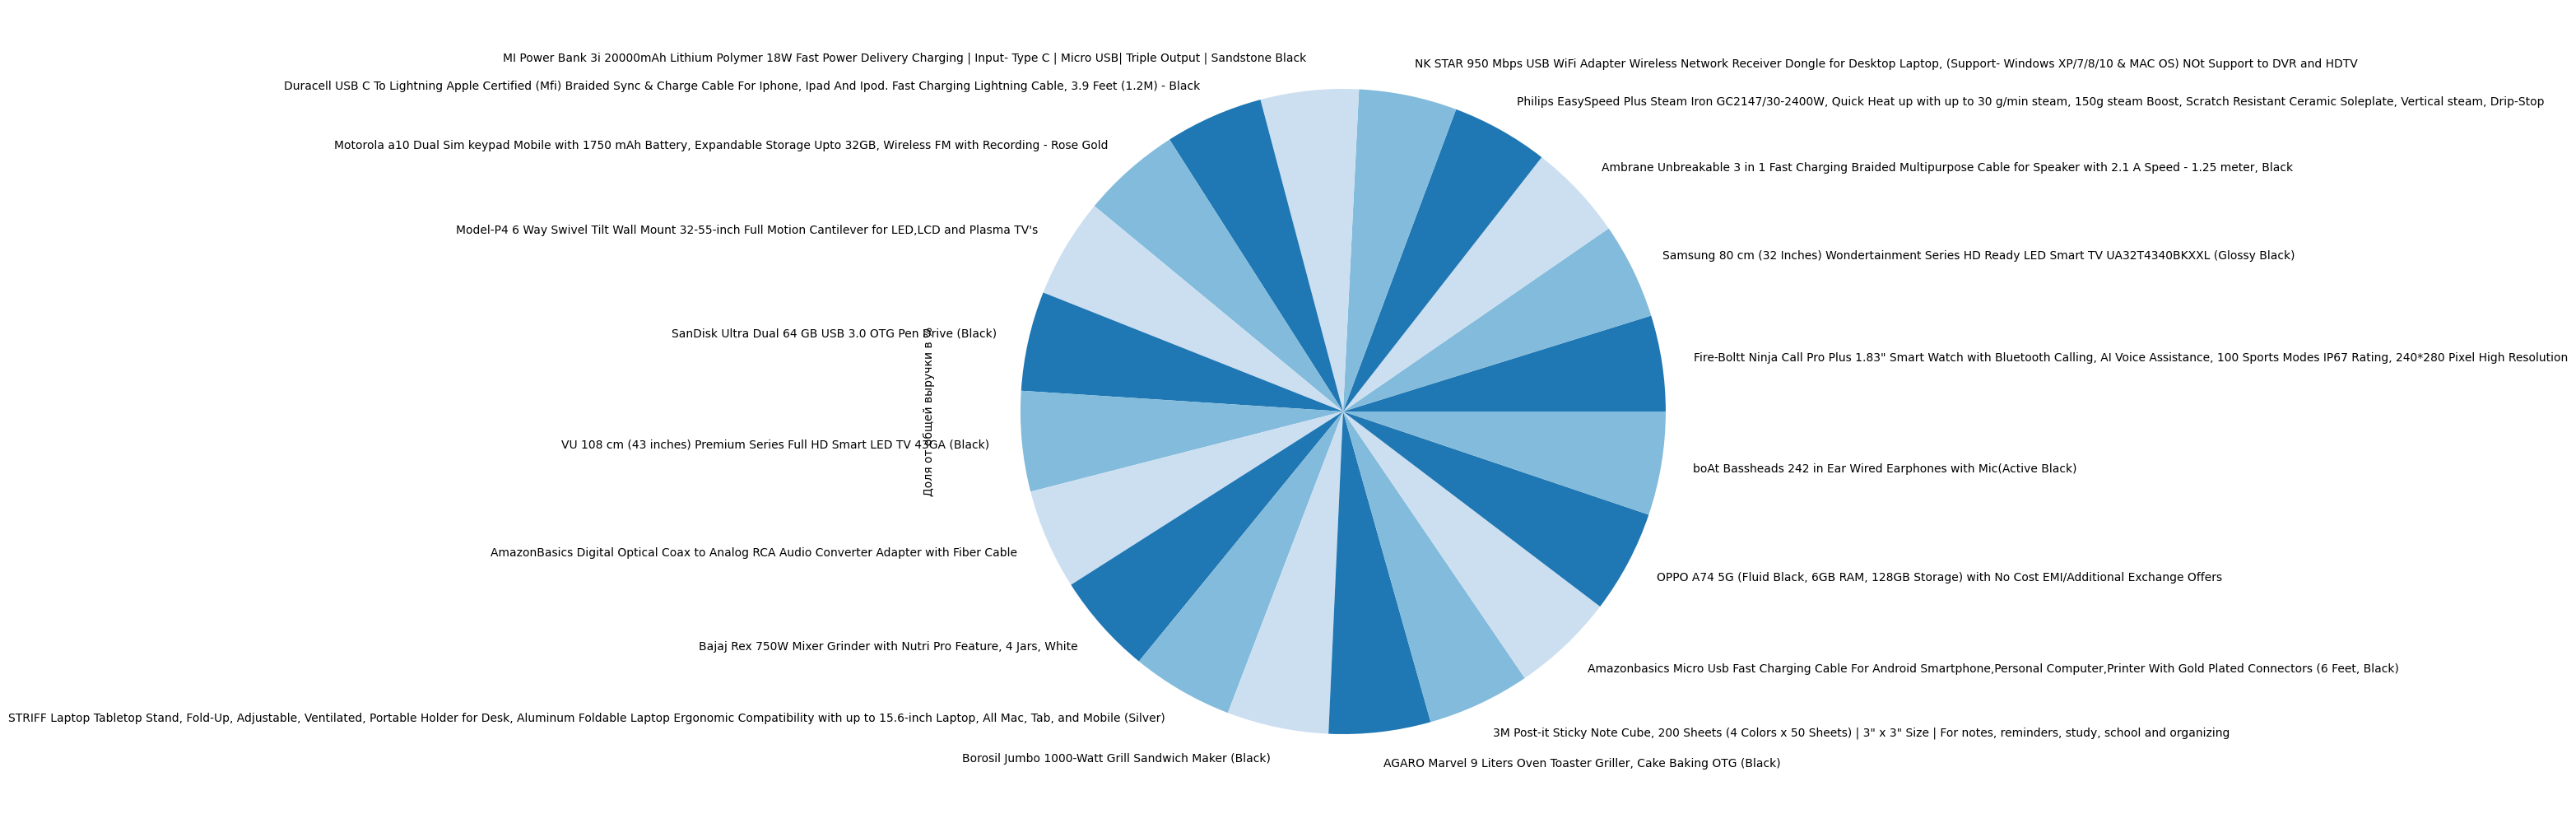

In [46]:
plt.style.use('_mpl-gallery-nogrid')
df.plot(y = 'Доля от общей выручки в %', kind = 'pie', figsize=(10,10), legend=None)
plt.show()